In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as datetime
import re as re

In [48]:
df = pd.read_csv("weatherHistory.csv")
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [51]:
# extracting the dates and the hours from the "Formatted Date" column
pattern = r'^(\d{4}-\d{2}-\d{2}) (\d{2}):'
df['Date'] = df['Formatted Date'].str.extract(pattern)[0]
df['Hour'] = df['Formatted Date'].str.extract(pattern)[1]
#df["Date"] = df["Date"].apply(pd.to_datetime) takes too long
#df["Hour"] = df["Hour"].apply(pd.to_datetime) takes too long

df.drop(["Daily Summary", "Formatted Date", "Summary", "Precip Type"], axis=1, inplace=True) # removing this column which wont be useful
df.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Date,Hour
0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,2006-04-01,00
1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,2006-04-01,01
2,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,2006-04-01,02
3,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,2006-04-01,03
4,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,2006-04-01,04


C:\Users\thoma\AppData\Local\Temp\ipykernel_12160\1803947528.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample1["Date"] = sample1["Date"].apply(pd.to_datetime)
C:\Users\thoma\AppData\Local\Temp\ipykernel_12160\1803947528.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample1["Temperature (C)"] = sample1["Temperature (C)"] / len(sample1["Temperature (C)"])


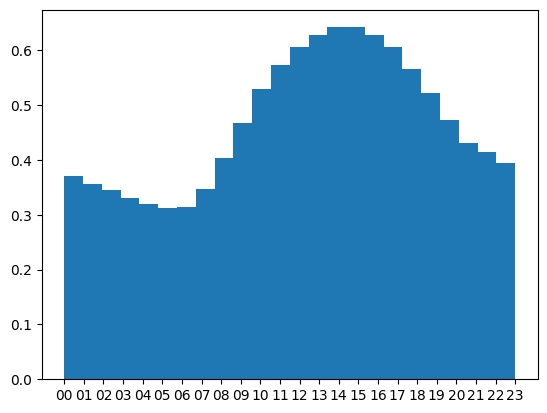

In [60]:
sample1 = df[df["Date"] < "2007-01-01"] # year 2006

sample1["Date"] = sample1["Date"].apply(pd.to_datetime)
sample1["Temperature (C)"] = sample1["Temperature (C)"] / len(sample1["Temperature (C)"])

plt.hist(sample1["Hour"], bins=24, weights=sample1["Temperature (C)"]);

C:\Users\thoma\AppData\Local\Temp\ipykernel_12160\3850758265.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample1["Day of week"] = sample1["Date"].dt.dayofweek


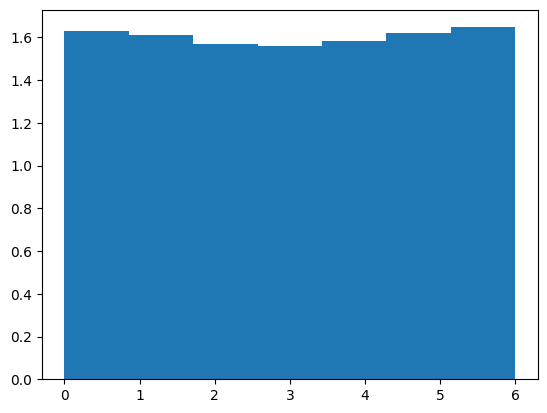

In [61]:
sample1["Day of week"] = sample1["Date"].dt.dayofweek
plt.hist(sample1["Day of week"], bins=7, weights=sample1["Temperature (C)"]);

In [ ]:
# creating the heatmap
plt.figure(figsize=(12,8))
plt.hist2d(sample1["Hour"],
           sample1["Day of week"],
           bins=[24,7],
           weights=sample1["Temperature (C)"])

plt.colorbar();